# KICKSTARTER I

In [1]:
#Import libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import datetime as dt 

In [2]:
# GENERAL : Read the data set
kickstarter = pd.read_csv('ks-projects-201801.csv')

In [3]:
# GENERAL : Basic structure of the database (rows and columns)
print(kickstarter.shape)

(378661, 15)


In [4]:
# GENERAL : Print the header of the DataFrame 
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
# GENERAL Problems that might arise 

    #Data types problems: 
        # format dates in deadline and launched is different, we might change them into datetime
    
    # Missing data problems : 
        # None from now 
    
    # Text/ categorical data problems : 
        # Missunderstanfing of terms: 
            #goal is the amount of money that a creator needs 
            #pledged is the amount pledged by "crowd"
            #usd_pledged is a conversion by kickstarter 
            #usd pledge real is a conversion used in Fixer.io
            #usd goal real : conversion of the goal column  


In [6]:
# GENERAL : Print the data types of DataFrame
kickstarter.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [25]:
# LAUNCHED & DEADLINE : Adjust all data frame to common datetime format
kickstarter['deadline'] = pd.to_datetime(kickstarter.deadline)
kickstarter['launched'] = pd.to_datetime(kickstarter.launched)


#Check if format was changed 
kickstarter.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [8]:
# GENERAL : Print info of DataFrame
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                378661 non-null  int64         
 1   name              378657 non-null  object        
 2   category          378661 non-null  object        
 3   main_category     378661 non-null  object        
 4   currency          378661 non-null  object        
 5   deadline          378661 non-null  datetime64[ns]
 6   goal              378661 non-null  float64       
 7   launched          378661 non-null  datetime64[ns]
 8   pledged           378661 non-null  float64       
 9   state             378661 non-null  object        
 10  backers           378661 non-null  int64         
 11  country           378661 non-null  object        
 12  usd pledged       374864 non-null  float64       
 13  usd_pledged_real  378661 non-null  float64       
 14  usd_

In [9]:
# There seems to be missing data in the folowing columns: name, usd pledged.
# There are a variety of options we can do to solve this problem: 
    #Dropping missing data (if the data dropped does not impact or skew our data)
    #Setting to missing and impute with statistical measures (median, mean, mode ...)
    #Imputing with more complex algorithmic/machine learning based approaches
    #Impute based on business assumptions of our data
 

In [10]:
# GENERAL : MISSING VALUES ANALYSIS 

#P GENERAL :Print number of missing values  
kickstarter.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [11]:
# GENERAL : NULL VALUES (if True= there are)

kickstarter.isnull().values.any()

True

In [12]:
# GENERAL : Print description of DataFrame
kickstarter.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [15]:
# GENERAL : Find number of unique values in 'category' column 
kickstarter['category'].unique()


array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware',
       'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

In [16]:
# CATEGORY : ow many values of different categories do we have? 
kickstarter ['category'].value_counts()

Product Design     22314
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64

In [17]:
# MAIN CATEGORY : How many values of different main categories do we have? 
kickstarter ['main_category'].value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

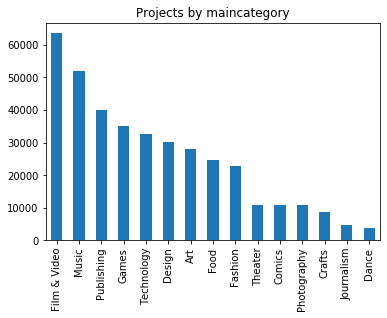

In [18]:
 # MAIN CATEGORY : Plot main categories 

kickstarter['main_category'].value_counts().plot.bar(title='Projects by maincategory')

In [19]:
# CURRENCY : How many values of currency do we have? 
kickstarter ['currency'].value_counts()

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

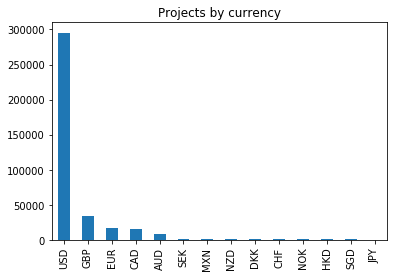

In [20]:
# CURRENCY: Plot projects by currency 
kickstarter['currency'].value_counts().plot.bar(title='Projects by currency')

In [39]:
# LAUNCHED : When was the first project launched ? 
kickstarter['launched'].sort_values().head(10)


75397    1970-01-01 01:00:00
319002   1970-01-01 01:00:00
2842     1970-01-01 01:00:00
94579    1970-01-01 01:00:00
247913   1970-01-01 01:00:00
273779   1970-01-01 01:00:00
48147    1970-01-01 01:00:00
169268   2009-04-21 21:02:48
322000   2009-04-23 00:07:53
138572   2009-04-24 21:52:03
Name: launched, dtype: datetime64[ns]

In [64]:
# LAUNCHED = outcome shows an error since Kickstarter was launched way after 1970
# Approach to correct this error is to change all 1970 dates to the first date after KK foundation (2008 )
import datetime as dt

kickstarter1970 = kickstarter['launched'].dt.datetime(1970,month=1,day=1, hour=1,minute =0,second = 0)
kickstarter1970 = kickstarter1970.replace(dt.datetime(2009,month=4,day=21, hour=21,minute =2,second = 48))
print(kickstarter1970)

AttributeError: 'DatetimeProperties' object has no attribute 'datetime'

In [61]:
# LAUNCHED : Check if error was properly corrected
kickstarter['launched'].sort_values().head(10)

75397    1970-01-01 01:00:00
319002   1970-01-01 01:00:00
2842     1970-01-01 01:00:00
94579    1970-01-01 01:00:00
247913   1970-01-01 01:00:00
273779   1970-01-01 01:00:00
48147    1970-01-01 01:00:00
169268   2009-04-21 21:02:48
322000   2009-04-23 00:07:53
138572   2009-04-24 21:52:03
Name: launched, dtype: datetime64[ns]

In [40]:
# LAUNCHED : When was the last project launched ?
kickstarter['launched'].sort_values(ascending = False).head(10)

66683    2018-01-02 15:02:31
163161   2018-01-02 14:38:17
217150   2018-01-02 14:17:46
373787   2018-01-02 14:15:38
95778    2018-01-02 14:13:09
100061   2018-01-02 14:07:02
275919   2018-01-02 14:04:11
340295   2018-01-02 13:11:02
236590   2018-01-02 13:02:29
125582   2018-01-02 12:45:34
Name: launched, dtype: datetime64[ns]

In [41]:
# DEADLINE : When was the first deadline to be met?
kickstarter ['deadline'].sort_values().head(10)

138572   2009-05-03
213711   2009-05-16
342226   2009-05-16
28960    2009-05-20
196244   2009-05-22
122662   2009-05-26
235255   2009-05-29
345606   2009-05-29
148270   2009-05-29
357003   2009-05-31
Name: deadline, dtype: datetime64[ns]

In [38]:
# DEADLINE: When was the last project DEADLINE?
kickstarter['deadline'].sort_values(ascending = False).head()

7164     2018-03-03
180250   2018-03-03
226982   2018-03-03
124919   2018-03-02
292034   2018-03-02
Name: deadline, dtype: datetime64[ns]

In [ ]:
# MORE COMMENTS ON DATES : 
    # 1) Launched has 7 rows with 1970 dates
    # 2) Deadline starts at 2009, it make sense because after the 7 rows with 1970 error then 2009 is folllowing

In [21]:
#How many values of state do we have? 
kickstarter ['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

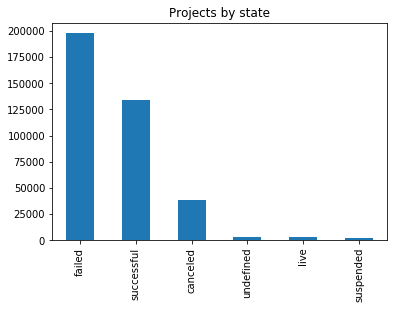

In [22]:
#Plot projects by state
kickstarter['state'].value_counts().plot.bar(title='Projects by state')

In [23]:
#How many values of countries do we have? 
kickstarter ['country'].value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [1]:
#How many values of backers do we have? 
kickstarter ['backers'].value_counts()

NameError: name 'kickstarter' is not defined

In [28]:
#There is an error in N,0" which we will catalog as 'OTHER'
kickstarter.country = kickstarter.country.replace(to_replace= 'N,0"',value = 'OTHER')

#I am going to check if  the error was corrected properly 
kickstarter ['country'].value_counts()


US       292627
GB        33672
CA        14756
AU         7839
DE         4171
OTHER      3797
FR         2939
IT         2878
NL         2868
ES         2276
SE         1757
MX         1752
NZ         1447
DK         1113
IE          811
CH          761
NO          708
HK          618
BE          617
AT          597
SG          555
LU           62
JP           40
Name: country, dtype: int64

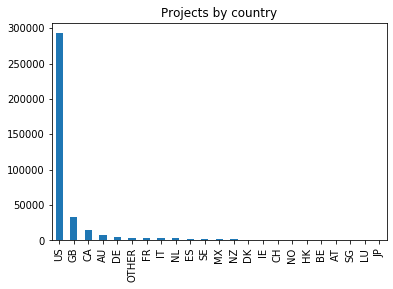

In [29]:
#Plot projects by country
kickstarter['country'].value_counts().plot.bar(title='Projects by country')

In [ ]:
# CREATION OF NEW VARIABLES 
# 1) Founded = pledge > goal 
# 2) % pledged / goal 
# 3) Time to raise money = deadline -launched 